<a href="https://colab.research.google.com/github/Bola-fadipe/Sales_EDA/blob/main/sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis of a sales dataset
- data was sourced from : https://github.com/KeithGalli/Pandas-Data-Science-Tasks (Thanks Keith Galli :))
- the folder consist of files containing 12 months of sales data
- data analysis will be done in google colaboratory

In [54]:
# Importing necessary libraries/modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import glob

In [3]:
# getting a list of all files in the folder with matching pattern
path = '/content/sales'
files =  glob.glob(path + '/*.csv')


In [4]:
print(files)

['/content/sales/Sales_March_2019.csv', '/content/sales/Sales_April_2019.csv', '/content/sales/Sales_August_2019.csv', '/content/sales/Sales_September_2019.csv', '/content/sales/Sales_October_2019.csv', '/content/sales/Sales_May_2019.csv', '/content/sales/Sales_December_2019.csv', '/content/sales/Sales_July_2019.csv', '/content/sales/Sales_November_2019.csv', '/content/sales/Sales_June_2019.csv', '/content/sales/Sales_February_2019.csv', '/content/sales/Sales_January_2019.csv']


In [5]:
# initialising an empty sales list
sales = []

In [6]:
# looping through all the file in files and creating dataframes which are saved to the empty sales list
for file in files:
  sales_data = pd.read_csv(file)
  sales.append(sales_data)
  print(f'Successfully created dataframe for {file} with shape {sales_data.shape}') # check if iteration was successful

Successfully created dataframe for /content/sales/Sales_March_2019.csv with shape (15226, 6)
Successfully created dataframe for /content/sales/Sales_April_2019.csv with shape (18383, 6)
Successfully created dataframe for /content/sales/Sales_August_2019.csv with shape (12011, 6)
Successfully created dataframe for /content/sales/Sales_September_2019.csv with shape (11686, 6)
Successfully created dataframe for /content/sales/Sales_October_2019.csv with shape (20379, 6)
Successfully created dataframe for /content/sales/Sales_May_2019.csv with shape (16635, 6)
Successfully created dataframe for /content/sales/Sales_December_2019.csv with shape (25117, 6)
Successfully created dataframe for /content/sales/Sales_July_2019.csv with shape (14371, 6)
Successfully created dataframe for /content/sales/Sales_November_2019.csv with shape (17661, 6)
Successfully created dataframe for /content/sales/Sales_June_2019.csv with shape (13622, 6)
Successfully created dataframe for /content/sales/Sales_Febru

In [7]:
# joining each created created dataframe vertically
data = pd.concat(sales, axis = 0)

In [8]:
# creating a copy of the dataframe in order to have a backup
df = data.copy()

### View of basic info about the data 

In [9]:
df.shape

(186850, 6)

In [10]:
df.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11177,220582,Flatscreen TV,1,300,06/07/19 13:53,"311 Chestnut St, San Francisco, CA 94016"
778,141982,27in FHD Monitor,1,149.99,01/11/19 15:57,"624 Highland St, Atlanta, GA 30301"
6402,168117,Wired Headphones,1,11.99,03/04/19 10:55,"448 Highland St, Portland, OR 97035"
5828,253741,27in 4K Gaming Monitor,1,389.99,09/17/19 10:54,"859 13th St, Portland, OR 97035"
1302,142472,AAA Batteries (4-pack),2,2.99,01/19/19 10:03,"410 6th St, Boston, MA 02215"


In [11]:
df.columns.to_list()

['Order ID',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Order Date',
 'Purchase Address']

In [12]:
# converting column names to lowercase & snakecase for ease of use
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

In [13]:
df.columns.to_list()

['order_id',
 'product',
 'quantity_ordered',
 'price_each',
 'order_date',
 'purchase_address']

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          186305 non-null  object
 1   product           186305 non-null  object
 2   quantity_ordered  186305 non-null  object
 3   price_each        186305 non-null  object
 4   order_date        186305 non-null  object
 5   purchase_address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB



##### Todos:
  - convert quantity_ordered dtype from object to int64
  - convert price_each dtype from object to datetime

In [16]:
# converting to int dtype
# check for the unique values in quantity_ordered 
df.quantity_ordered.unique()


array(['1', '2', '5', '3', '4', '6', 'Quantity Ordered', nan, '7', '8',
       '9'], dtype=object)

In [17]:
# quering the 'Quantity Ordered' values of quantity_ordered column
df.query("quantity_ordered == 'Quantity Ordered'")

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
433,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
864,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
930,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1979,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2032,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
6506,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
7544,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
7674,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
8271,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


*1065 rows of dat contain invalid entries for all columns. these rows will be dropped.

In [18]:
to_drop = df.query("quantity_ordered == 'Quantity Ordered'").index

In [19]:
df.drop(to_drop, axis=0, inplace=True)

In [20]:
df.quantity_ordered.unique()

array(['1', '2', '5', '3', '4', '6', nan, '7', '8', '9'], dtype=object)

In [21]:
df.loc[df.quantity_ordered.isna()]

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
1047,NaN,NaN,NaN,NaN,NaN,NaN
1542,NaN,NaN,NaN,NaN,NaN,NaN
1653,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN
2043,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
8596,NaN,NaN,NaN,NaN,NaN,NaN
8623,NaN,NaN,NaN,NaN,NaN,NaN
9144,NaN,NaN,NaN,NaN,NaN,NaN
9631,NaN,NaN,NaN,NaN,NaN,NaN


- the data contains missing values which should be dropped

In [22]:
df.dropna(axis=0, how='any', inplace=True)

In [23]:
df.isna().sum()

order_id            0
product             0
quantity_ordered    0
price_each          0
order_date          0
purchase_address    0
dtype: int64

- data now clean. dtype conversion can now be made successfully

In [24]:
df.quantity_ordered = df.quantity_ordered.astype('int64')

In [25]:
df.price_each = df.price_each.astype('float64')

In [26]:

df.order_date = df.order_date.astype('datetime64')

In [27]:
df.order_date.dtype

dtype('<M8[ns]')

In [29]:
df.head(2)

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
0,162009,iPhone,1,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301"


In [104]:
# calculating the total_price of each product
ser = df.quantity_ordered.mul(df.price_each)

# placing the total_price column next to price_each column
df.insert(4, 'total_price', ser)


In [105]:
df.head()

,order_id,product,quantity_ordered,price_each,total_price,order_date,purchase_address
0,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,99.99,2019-03-17 05:39:00,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,379.99,2019-03-10 00:01:00,"764 13th St, San Francisco, CA 94016"


In [106]:
df.describe()

,quantity_ordered,price_each,total_price
count,182735.000000,182735.000000,182735.000000
mean,1.124333,184.315392,185.403890
std,0.442937,332.684344,332.877445
min,1.000000,2.990000,2.990000
25%,1.000000,11.950000,11.950000
50%,1.000000,14.950000,14.950000
75%,1.000000,150.000000,150.000000
max,9.000000,1700.000000,3400.000000


## Univariate Analysis:

In [32]:
df.price_each = round(df.price_each,2)

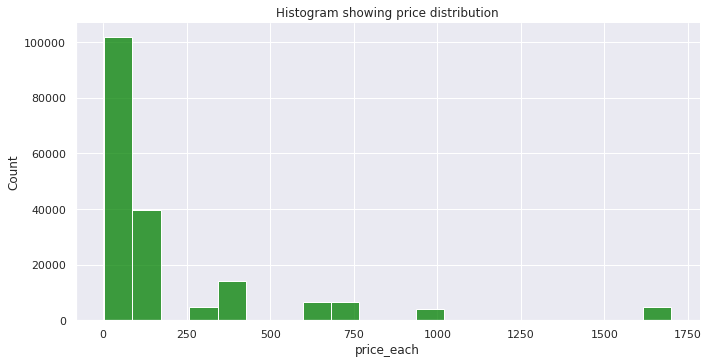

In [61]:

sns.displot(data=df, x='price_each', color='green', bins=20, height=5, aspect=2)
plt.title('Histogram showing price distribution');

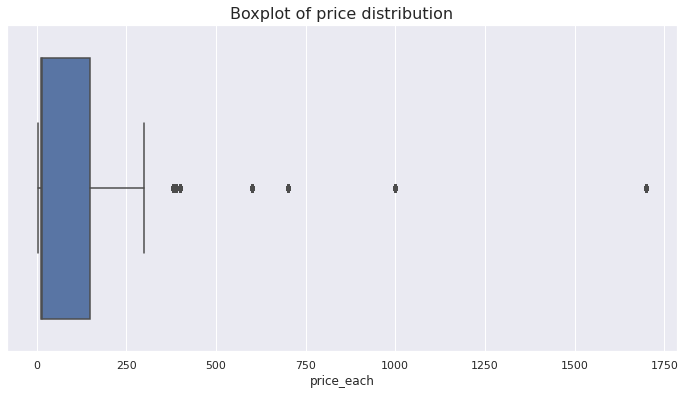

In [57]:
sns.set(rc={"figure.figsize":(12, 6)})
sns.boxplot(data=df, x='price_each')
plt.title('Boxplot of price distribution', size=16);

In [40]:
df.loc[df.price_each > 1500]

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
28,162035,Macbook Pro Laptop,1,1700.0,2019-03-08 13:07:00,"44 4th St, Los Angeles, CA 90001"
58,162064,Macbook Pro Laptop,1,1700.0,2019-03-05 09:00:00,"414 Willow St, San Francisco, CA 94016"
100,162101,Macbook Pro Laptop,1,1700.0,2019-03-30 10:47:00,"253 11th St, Seattle, WA 98101"
119,162120,Macbook Pro Laptop,1,1700.0,2019-03-15 18:43:00,"969 Washington St, Dallas, TX 75001"
123,162124,Macbook Pro Laptop,1,1700.0,2019-03-27 09:52:00,"8 West St, San Francisco, CA 94016"
...,...,...,...,...,...,...
9529,150314,Macbook Pro Laptop,1,1700.0,2019-01-27 09:52:00,"907 Meadow St, Austin, TX 73301"
9542,150325,Macbook Pro Laptop,1,1700.0,2019-01-29 12:50:00,"849 Church St, San Francisco, CA 94016"
9577,150359,Macbook Pro Laptop,1,1700.0,2019-01-13 22:28:00,"769 7th St, San Francisco, CA 94016"
9648,150429,Macbook Pro Laptop,1,1700.0,2019-01-15 19:54:00,"911 Wilson St, New York City, NY 10001"


*The price distribution is right skewed with a mean of $184.31 and median of $14.95. The skewness is due to products such as laptops, whose selling prices far outweigh the prices of pther products, thus pulling the mean to the right. Most of the products cost less than $250.*

In [95]:
df.quantity_ordered.value_counts()

1    165650
2     13082
3      2870
4       789
5       232
6        80
7        24
8         5
9         3
Name: quantity_ordered, dtype: int64

*most orders were place for a single item

In [107]:
# monthly trend of quantity ordered:
import datetime

In [119]:
month_ordered = df.order_date.dt.month

In [120]:
df.insert(6,'order_month', month_ordered)

In [121]:
df.head(2)

,order_id,product,quantity_ordered,price_each,total_price,order_date,order_month,purchase_address
0,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,3,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,3,"942 Church St, Austin, TX 73301"


In [128]:
df['order_month'] = df.order_month.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'April', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})

In [129]:
df.head()

,order_id,product,quantity_ordered,price_each,total_price,order_date,order_month,purchase_address
0,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,Mar,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,Mar,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,23.98,2019-03-28 20:59:00,Mar,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,99.99,2019-03-17 05:39:00,Mar,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,379.99,2019-03-10 00:01:00,Mar,"764 13th St, San Francisco, CA 94016"


In [151]:
sales_per_year = np.round(df.total_price.aggregate('sum' ), 2)
sales_per_year

33879779.77

total sales was $33,879,779.79

In [153]:
# average mothly sales per year
avg_mon_sales = sales_per_year/ 12
avg_mon_sales

2823314.9808333335

In [137]:
monthly_sales = df.groupby('order_month', as_index=False)['total_price'].sum()

In [142]:
monthly_sales.sort_values(by =['total_price'], axis=0, ascending=False)

,order_month,total_price
2,Dec,4.557905e+06
10,Oct,3.679254e+06
0,April,3.336376e+06
9,Nov,3.149785e+06
8,May,3.101881e+06
7,Mar,2.755969e+06
5,July,2.587445e+06
6,June,2.524465e+06
1,Aug,2.191698e+06
3,Feb,2.158127e+06


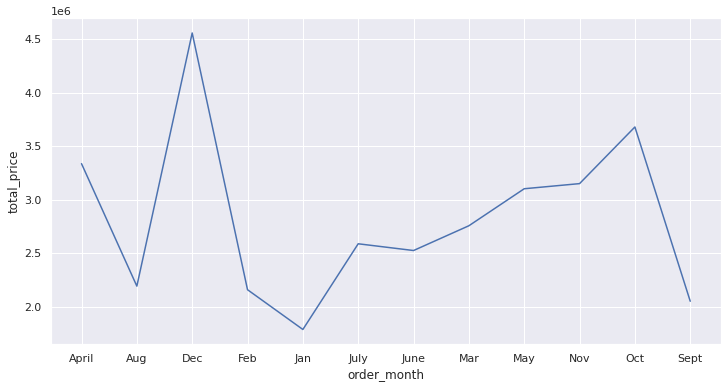

In [262]:

sns.lineplot(data=monthly_sales, x='order_month', y='total_price');

##### Insight:
 - most sales occur in December, with January being the worst month for business.
 


In [160]:
# months in which sales were above average:
mon_above_avg = monthly_sales[monthly_sales.total_price > avg_mon_sales]['order_month']

In [161]:
mon_above_avg

0     April
2       Dec
8       May
9       Nov
10      Oct
Name: order_month, dtype: object

- in the months of April, May, October and December, the company made above average monthly sales 

In [188]:
# which order made the highest purchase? 
sales_by_id = df.groupby('order_id', as_index=False)['total_price'].sum().sort_values(by =['total_price'], axis=0, ascending=False)

In [189]:
sales_by_id

,order_id,total_price
39065,181069,3779.99
112020,255318,3400.00
58217,200528,3400.00
67852,210292,3400.00
59867,202212,3400.00
...,...,...
20559,162223,2.99
91506,234402,2.99
91507,234403,2.99
91509,234405,2.99


- order number 39065 made the highest purchase

In [190]:
df.head(2)

,order_id,product,quantity_ordered,price_each,total_price,order_date,order_month,purchase_address
0,162009,iPhone,1,700.00,700.00,2019-03-28 20:59:00,Mar,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,14.95,2019-03-28 20:59:00,Mar,"942 Church St, Austin, TX 73301"


#### Analysis of product:
  - what are the various product categories?
  - which product are the most popular?
  -which product has the highest quantity ordered?
  - what is the popularity of the products by month?
  -which is the best selling product?
  -which is the best selling product in each month?

In [216]:
# product categories 
df.rename(columns={'product':'product_name'}, inplace=True) #-> df.product.unique was raising error(i guess a name collision) so I had to rename the column

In [206]:
list(df.product_name.unique())

['iPhone',
 'Lightning Charging Cable',
 'Wired Headphones',
 'Bose SoundSport Headphones',
 '34in Ultrawide Monitor',
 'AA Batteries (4-pack)',
 'USB-C Charging Cable',
 'AAA Batteries (4-pack)',
 'LG Washing Machine',
 'Apple Airpods Headphones',
 '27in 4K Gaming Monitor',
 'Google Phone',
 'Macbook Pro Laptop',
 '27in FHD Monitor',
 'ThinkPad Laptop',
 'Vareebadd Phone',
 'Flatscreen TV',
 '20in Monitor',
 'LG Dryer']

In [207]:
df.product_name.nunique()

19

- there are 19 products in the dataset

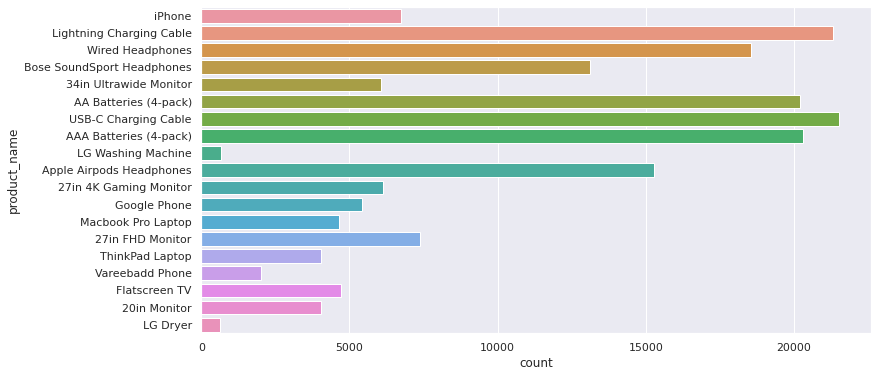

In [214]:
# most popular product
sns.countplot(data=df, y='product_name')

In [215]:
df.product_name.value_counts()

USB-C Charging Cable          21523
Lightning Charging Cable      21308
AAA Batteries (4-pack)        20293
AA Batteries (4-pack)         20214
Wired Headphones              18552
Apple Airpods Headphones      15273
Bose SoundSport Headphones    13109
27in FHD Monitor               7386
iPhone                         6725
27in 4K Gaming Monitor         6122
34in Ultrawide Monitor         6058
Google Phone                   5433
Flatscreen TV                  4705
Macbook Pro Laptop             4641
ThinkPad Laptop                4052
20in Monitor                   4032
Vareebadd Phone                2020
LG Washing Machine              649
LG Dryer                        640
Name: product_name, dtype: int64

- USB-C Charging Cable is the most popular product. There were 21,523 orders placed on this product in that year.
- LG dryer is the least popular product, having only 640 orders all through the year

In [230]:
# product with the highest quantity ordered:
highest_qty = df.groupby('product_name', as_index=False)['quantity_ordered'].sum()

In [224]:
highest_qty.sort_values(by=['quantity_ordered'], axis=0, ascending=False)

,product_name,quantity_ordered
5,AAA Batteries (4-pack),30487
4,AA Batteries (4-pack),27148
15,USB-C Charging Cable,23555
12,Lightning Charging Cable,22841
17,Wired Headphones,20201
6,Apple Airpods Headphones,15383
7,Bose SoundSport Headphones,13236
2,27in FHD Monitor,7429
18,iPhone,6732
1,27in 4K Gaming Monitor,6134


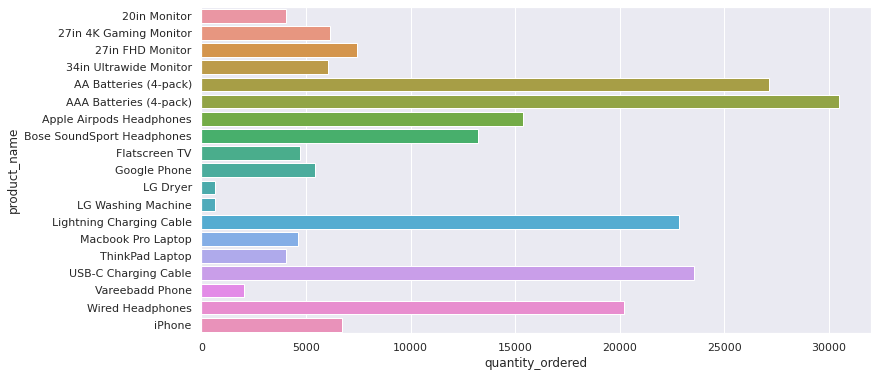

In [229]:
sns.barplot(data=highest_qty, x='quantity_ordered', y='product_name');

In [252]:
pop_by_month = df.groupby(['order_month', 'product_name'], as_index=False)['total_price'].sum()

In [253]:
pop_by_month

,order_month,product_name,total_price
0,April,20in Monitor,42566.13
1,April,27in 4K Gaming Monitor,216834.44
2,April,27in FHD Monitor,108892.74
3,April,34in Ultrawide Monitor,243193.60
4,April,AA Batteries (4-pack),10632.96
...,...,...,...
223,Sept,ThinkPad Laptop,239997.60
224,Sept,USB-C Charging Cable,18713.70
225,Sept,Vareebadd Phone,48000.00
226,Sept,Wired Headphones,15251.28


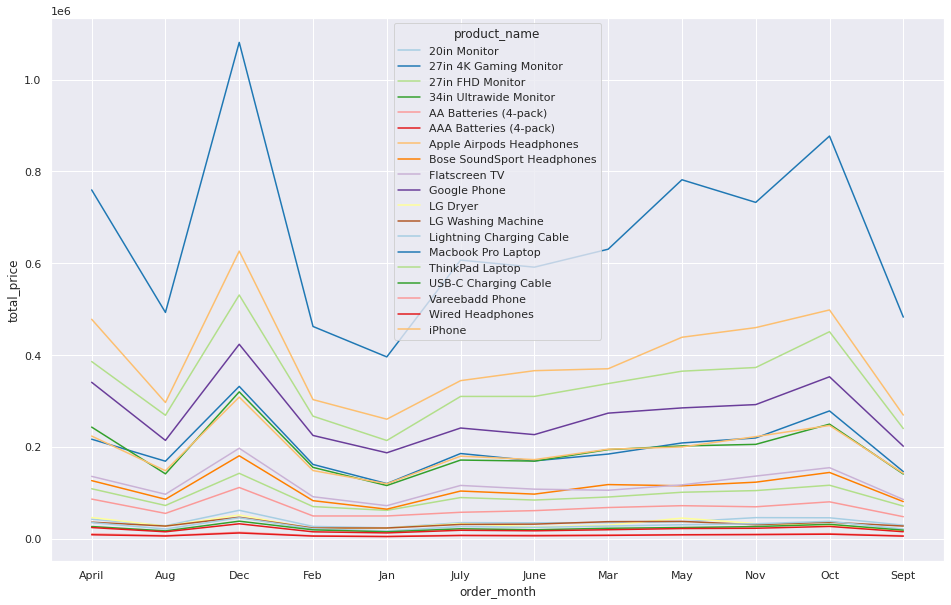

In [260]:
plt.figure(figsize=(16,10))
sns.lineplot(data=pop_by_month, x='order_month', y='total_price', hue='product_name', palette='Paired')


- sales of all product showed similar seasonality across the year. 
- All through the year, the Lightning Charging cable was the most sold

In [261]:
# save data for future update
df.to_csv('sales.csv', index=False)